In [1]:
#in unsupervised learning, only inputs are given, the machine then groups the data according to it
#there are not much datasets for unsupervised learning, we just give the inputs from the existing datasets
#no analysis and no accuracy prediction is possible


# Package import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [3]:
data = pd.read_csv(r"C:\Users\CTTC\Downloads\Datasets\iris.data",header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.columns = ['SL','SW','PL','PW','flower']   
data

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isnull().sum()

SL        0
SW        0
PL        0
PW        0
flower    0
dtype: int64

In [6]:
data.dtypes

SL        float64
SW        float64
PL        float64
PW        float64
flower     object
dtype: object

In [7]:
for i in data.columns:
    print(i,'\n',data[i].unique(),'\n')

SL 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9] 

SW 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6] 

PL 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2] 

PW 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3] 

flower 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



# Data Analysis

          SL        SW        PL        PW
SL  1.000000 -0.109369  0.871754  0.817954
SW -0.109369  1.000000 -0.420516 -0.356544
PL  0.871754 -0.420516  1.000000  0.962757
PW  0.817954 -0.356544  0.962757  1.000000


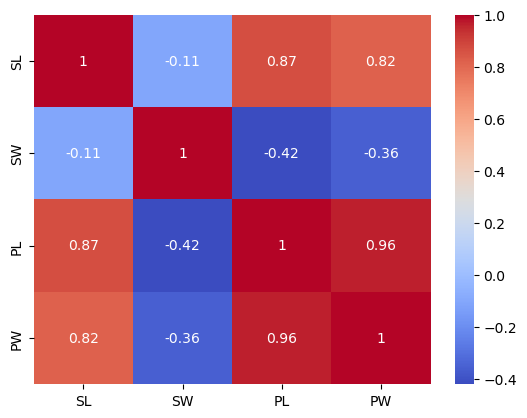

In [8]:
#heatmap
cor = data.corr()
print(cor)
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

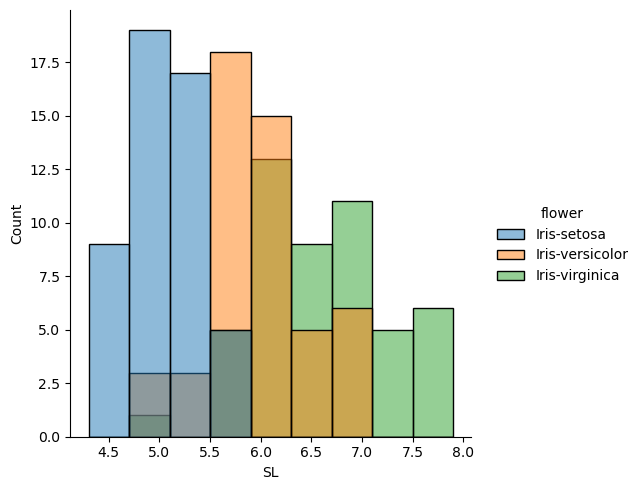

In [9]:
sns.displot(x=data.SL,hue=data.flower)
plt.show()

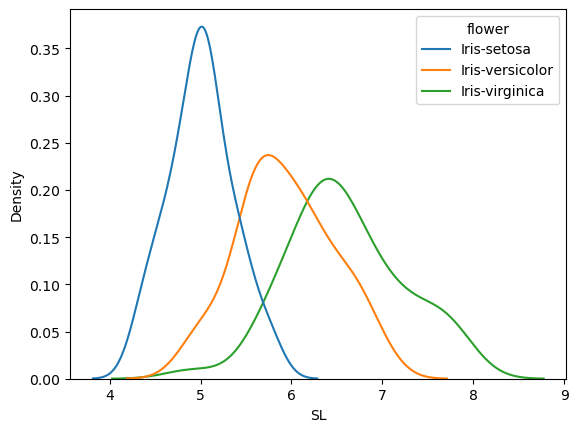

In [10]:
sns.kdeplot(x=data.SL,hue=data.flower)
plt.show()

# Label Encoding

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['flower'] = le.fit_transform(data['flower'])           #encoding
data['flower'].unique()

array([0, 1, 2])

In [12]:
data.flower = le.inverse_transform(data.flower)    #decoding

In [13]:
data.head()

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# ip/op creation

In [14]:
ip=data.drop('flower',axis=1)


# K-Means Clustering

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ip = sc.fit_transform(ip) 

In [16]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=3)
km.fit(ip)

KMeans(n_clusters=3)

In [17]:
k = km.predict(ip)
print(k)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


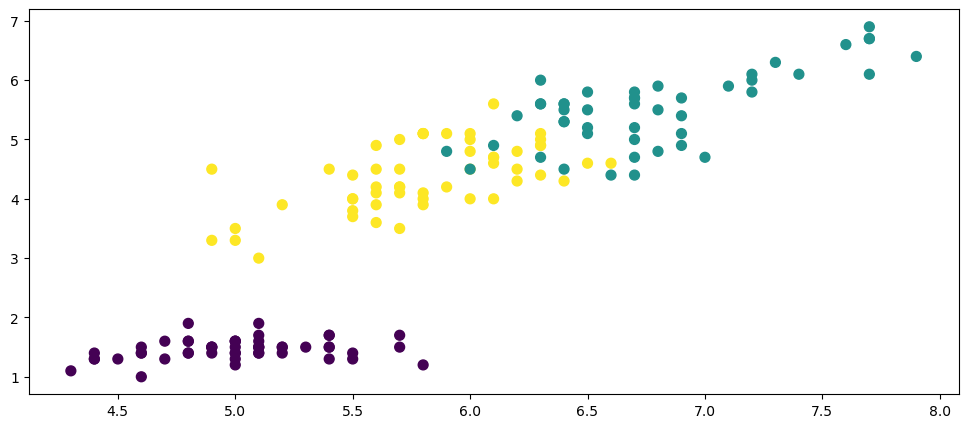

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(data.SL,data.PL,c=k,s=50,cmap='viridis')
plt.show()

In [19]:
data['Predict']=k
data

,SL,SW,PL,PW,flower,Predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [20]:
centroids = km.cluster_centers_
print(centroids)

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


In [21]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
data = pd.DataFrame(x,y)

In [22]:
data

,0,1
1,0.836857,2.136359
3,-1.413658,7.409623
0,1.155213,5.099619
3,-1.018616,7.814915
1,1.271351,1.892542
...,...,...
1,1.973698,1.579798
1,2.518342,1.391766
0,0.438990,4.535929
3,0.369479,7.791105


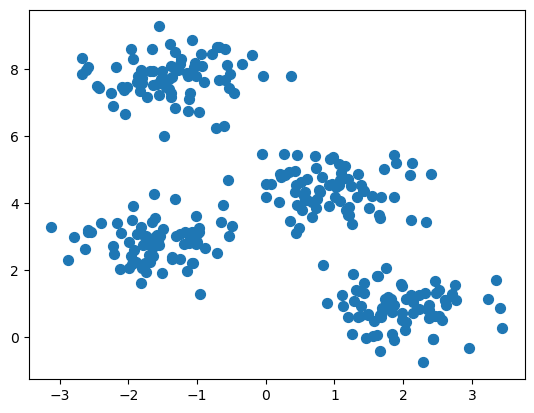

In [23]:
plt.scatter(x[:,0],x[:,1],s=50)
plt.show()

In [24]:
from sklearn import cluster

km1 = cluster.KMeans(n_clusters=4)
km1.fit(x)

KMeans(n_clusters=4)

In [26]:
yp1 = km1.predict(x)
data['predict']=yp1

In [30]:
centroid = km1.cluster_centers_
print(centroid)

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


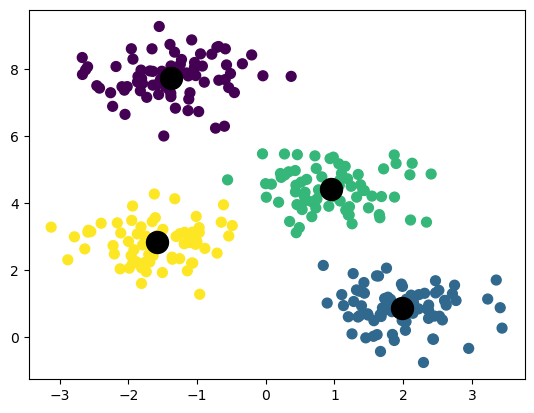

In [34]:
plt.scatter(x[:,0],x[:,1],c=yp1,s=50,cmap='viridis')
plt.scatter(centroid[:,0],centroid[:,1],s=250,c='black')
plt.show()


In [32]:
def ClusterIndicesNumpy(clustNum,Label_array):
    return np.where(Label_array==clustNum)

ClusterIndicesNumpy(2,km1.labels_)

(array([  2,   7,  12,  15,  16,  22,  25,  27,  29,  32,  40,  42,  43,
         61,  70,  77,  81,  85,  87,  90,  95,  98, 104, 107, 109, 115,
        119, 138, 142, 144, 147, 151, 153, 159, 161, 162, 164, 167, 169,
        170, 173, 178, 181, 184, 185, 186, 187, 190, 192, 193, 197, 200,
        204, 208, 210, 212, 213, 219, 226, 229, 230, 232, 235, 241, 250,
        253, 260, 261, 266, 268, 273, 277, 282, 289, 297], dtype=int64),)

In [35]:
x[ClusterIndicesNumpy(2,km1.labels_)]

array([[ 1.15521298e+00,  5.09961887e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-5.55523811e-01,  4.69595848e+00],
       [ 5.94762432e-01,  4.70964730e+00],
       [ 1.86725632e-01,  4.02683656e+00],
       [ 1.87271752e+00,  4.18069237e+00],
       [ 6.69786996e-01,  3.59540802e+00],
       [-4.74920358e-02,  5.47425256e+00],
       [ 1.54462126e+00,  4.21078127e+00],
       [ 5.71670482e-01,  4.32288566e+00],
       [ 1.32222457e+00,  4.17880807e+00],
       [ 1.19008992e+00,  4.72773123e+00],
       [ 5.95676822e-01,  4.08614263e+00],
       [ 9.35325115e-01,  5.33179296e+00],
       [ 4.28576743e-01,  4.97399710e+00],
       [ 5.29417185e-01,  3.80792420e+00],
       [ 1.16411070e+00,  3.79132988e+00],
       [ 2.72396035e-01,  5.46996004e+00],
       [ 1.05241733e+00,  4.54498095e+00],
       [ 1.